In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from cartpole import CartPole
from controllers import FullyActuated

In [2]:
# parameters for the cart-pole and simulation
cart_lim = np.array([-10,10]) #bounds for cart movement
pole_length = 1 
cart_mass = 1
pole_mass = 1
g = 9.81
fp = 0.01 #friction coefficient for prismatic joint
fr = 0.01 #friction coefficient for revolute joint
h = 0.01
cartpole = CartPole(cart_lim, pole_length, cart_mass, pole_mass, g, fp, fr) #creating cartpole

<IPython.core.display.Javascript object>


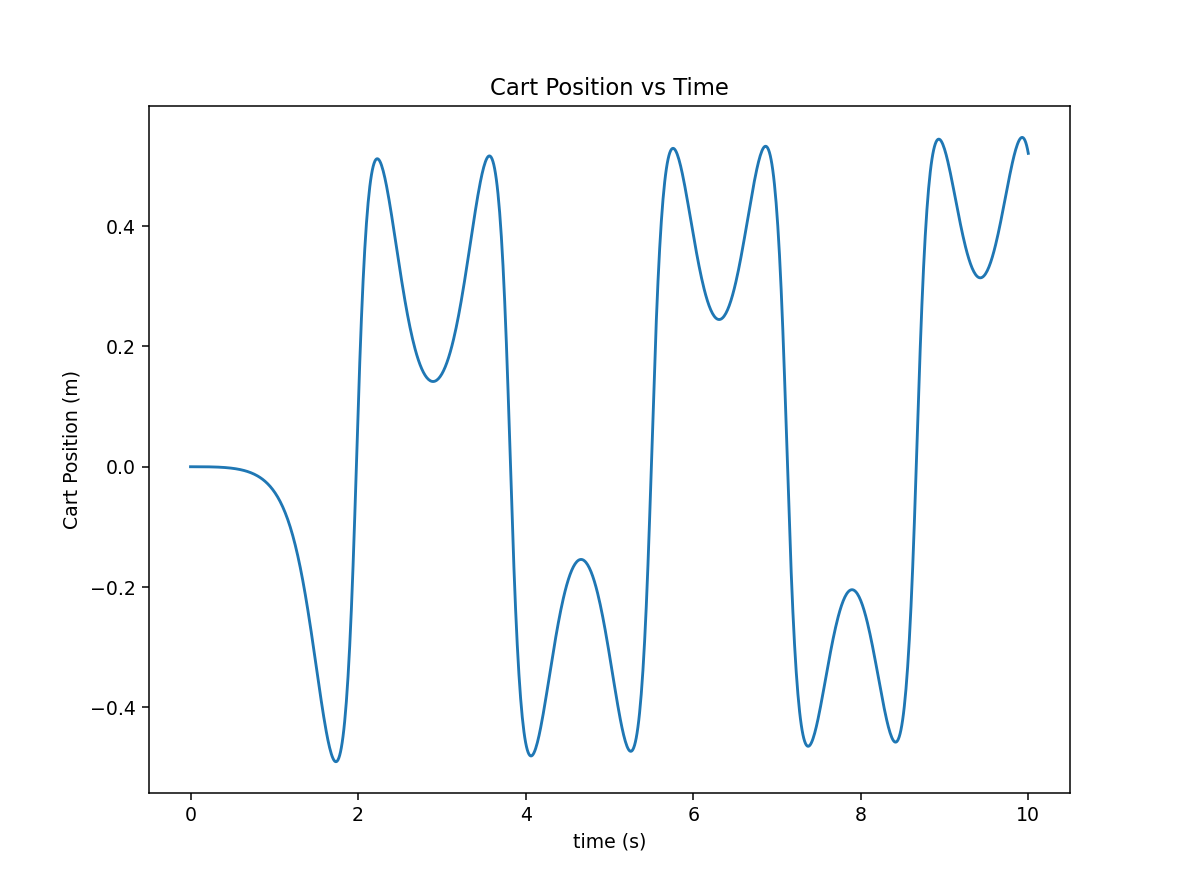

<IPython.core.display.Javascript object>


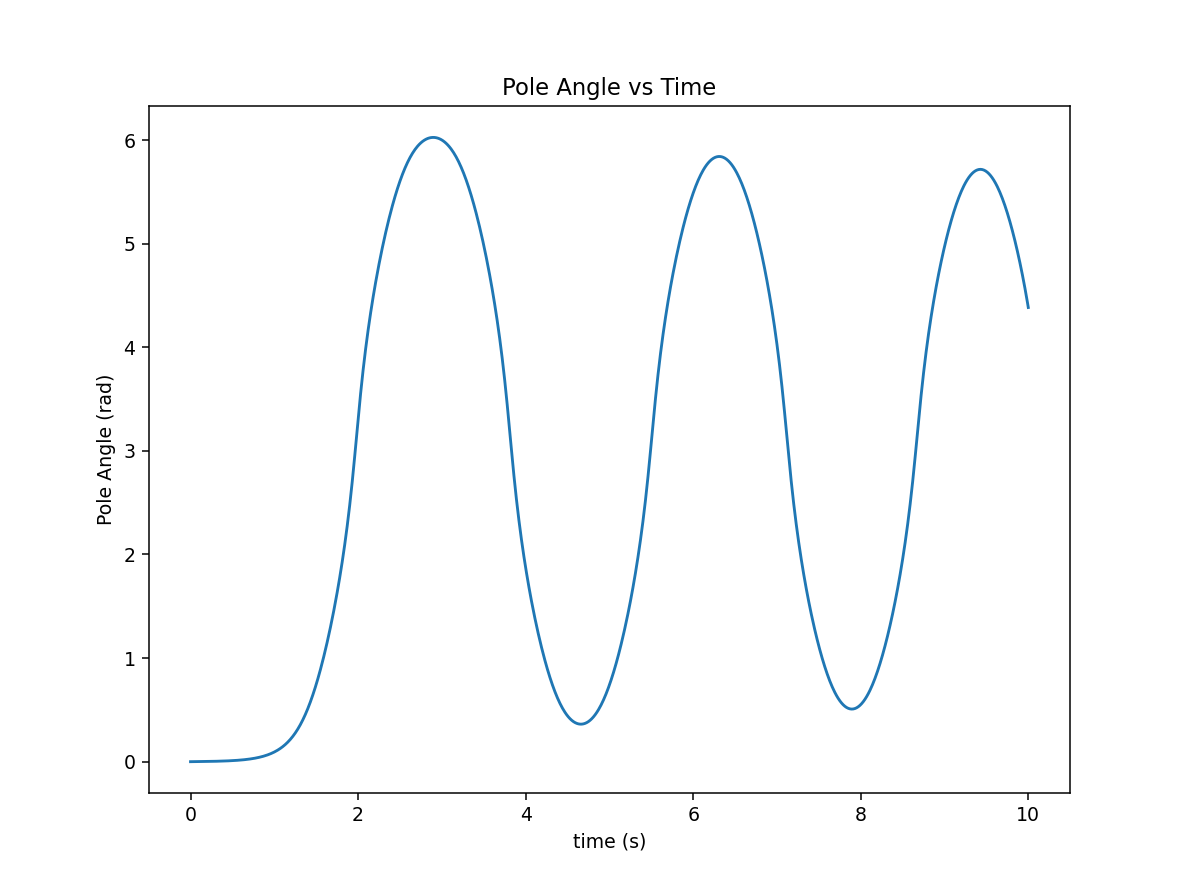

Text(0.5, 1.0, 'Pole Angle vs Time')

In [3]:
#initial position and velocity
q0 = np.array([[0,0]]).T
dq0 = np.array([[0, 0.01]]).T
t_end = 10 # time till which to simulate
iters = int(t_end/h) 
history = cartpole.unforcedIntegration(q0, dq0, iters, h) #simulating unforced swinging
plt.figure()
plt.plot(history[:,0],history[:,1])
plt.xlabel("time (s)")
plt.ylabel("Cart Position (m)")
plt.title("Cart Position vs Time")
plt.figure()
plt.plot(history[:,0],history[:,2])
plt.xlabel("time (s)")
plt.ylabel("Pole Angle (rad)")
plt.title("Pole Angle vs Time")

<IPython.core.display.Javascript object>


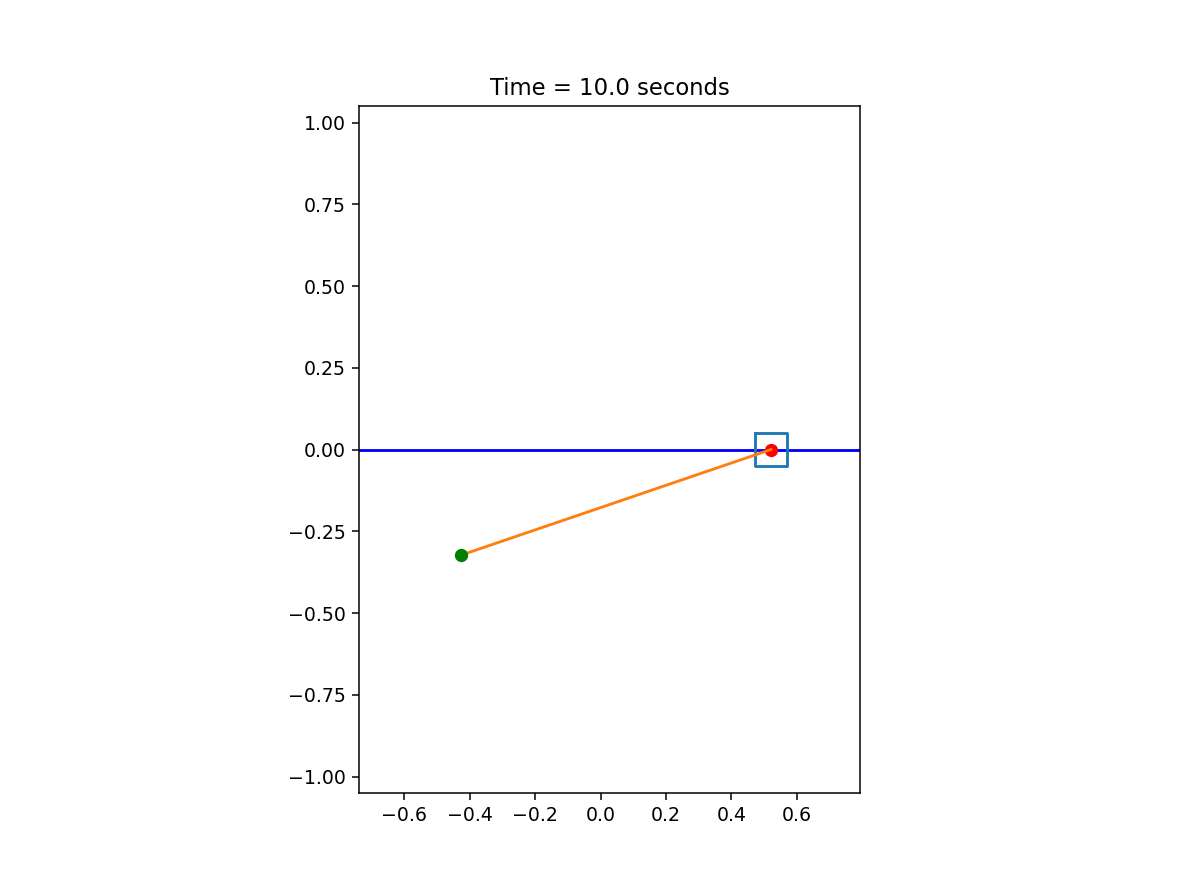

In [4]:
# animating unforced swinging
cartpole.animateHistory(history)

<IPython.core.display.Javascript object>


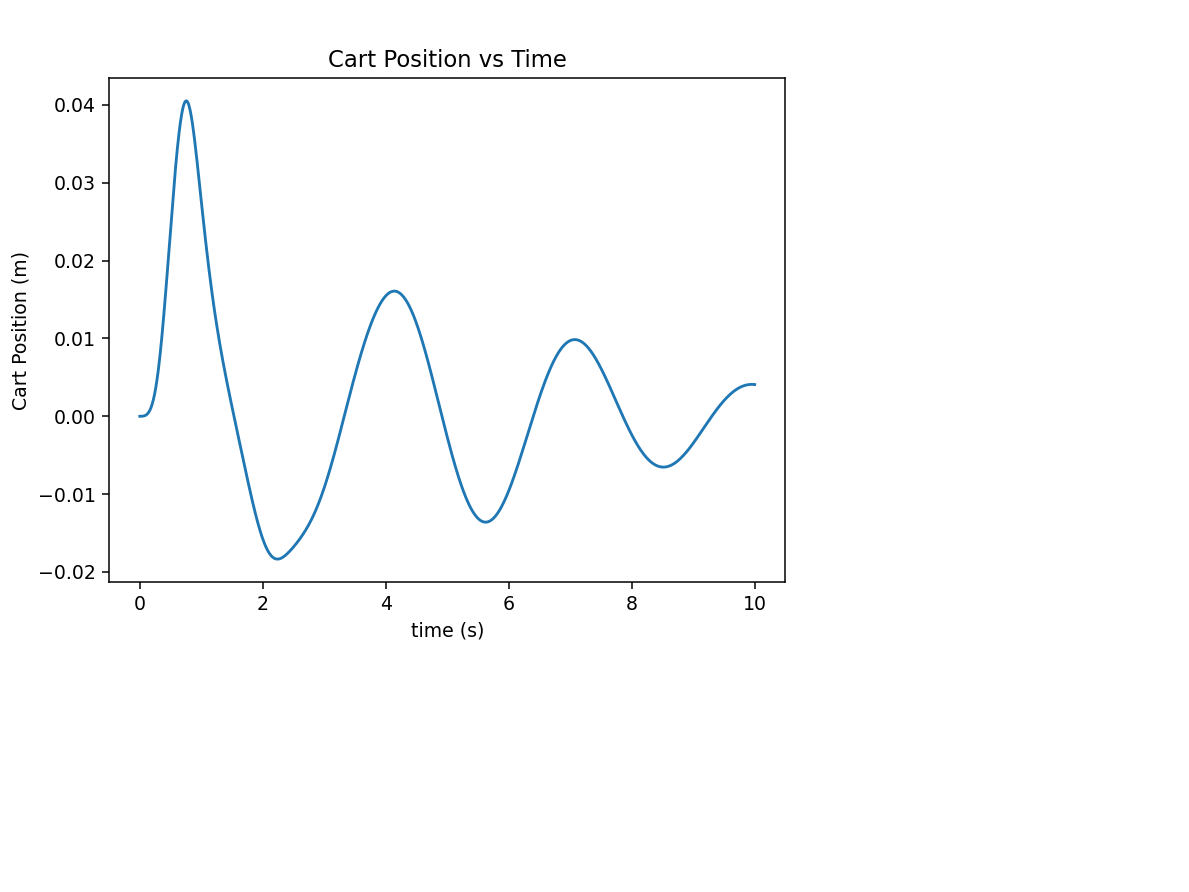

<IPython.core.display.Javascript object>


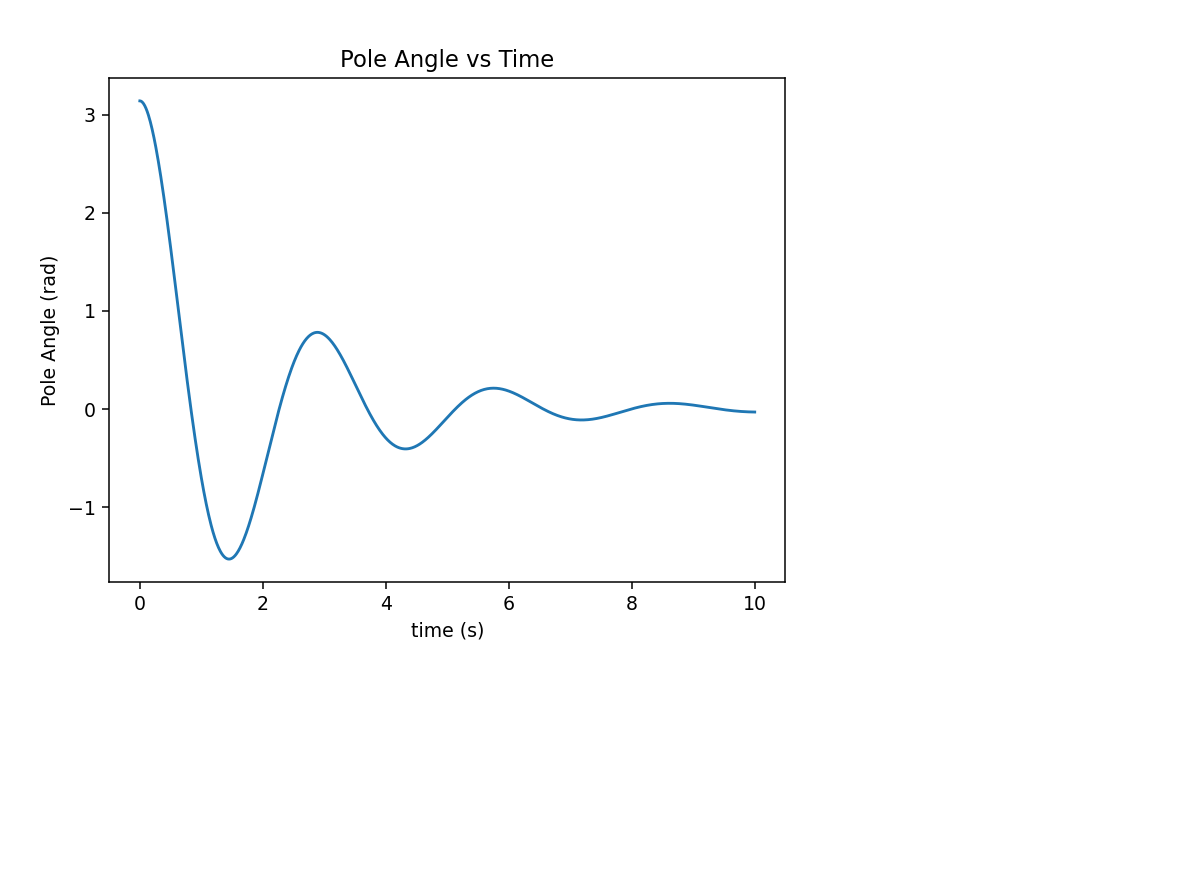

Text(0.5, 1.0, 'Pole Angle vs Time')

In [5]:
#testing fully actuated controller
Kp = np.array([[5,5]]).T #proportional gain
Kd = np.array([[1,1]]).T #derivative gain
controller = FullyActuated(cartpole,Kp,Kd) #creating a fully actuated inverse dynamics controller
ref = np.array([[0,0*np.pi/2]]).T #want to keep cartpole in this position
#initial state
q0 = np.array([[0,np.pi]]).T 
dq0 = np.array([[0,0]]).T
state = np.zeros((4,1))
state[0:2] = q0
state[2:4] = dq0
T_end = 10
iters =  int(T_end/h)
history = np.zeros((iters+1, 5))
history[0,0] = 0
history[0,1:] = state[:,0]
for i in range(iters):
    tau =  controller.command(ref, state)
    state += cartpole.rk4Step(state, tau, h)
    history[i+1,0] = history[i,0] + h
    history[i+1,1:] = state[:,0]

plt.figure()
plt.plot(history[:,0],history[:,1])
plt.xlabel("time (s)")
plt.ylabel("Cart Position (m)")
plt.title("Cart Position vs Time")
plt.figure()
plt.plot(history[:,0],history[:,2])
plt.xlabel("time (s)")
plt.ylabel("Pole Angle (rad)")
plt.title("Pole Angle vs Time")

<IPython.core.display.Javascript object>


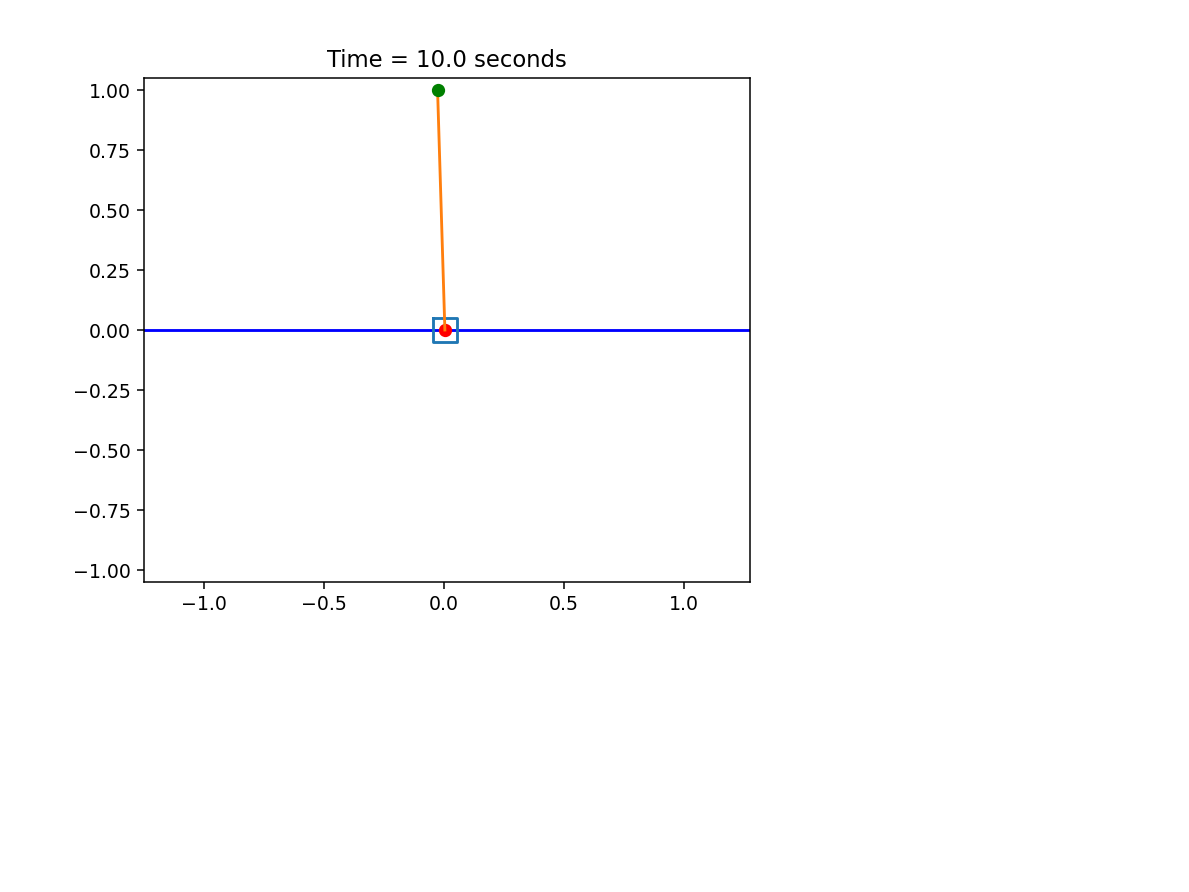

In [6]:
# animating controller response
cartpole.animateHistory(history)